<font color=red><h1> 1. Loading data and packages</h1></font>

<font color=green><h2> 1.1 Loading packages</h2></font>

In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import riskfolio as rp
from scipy.optimize import minimize
from datetime import timedelta, datetime
import seaborn as sns
import plotly.graph_objs as go
%matplotlib inline
import matplotlib.pyplot as plt
import random
from tabulate import tabulate
import warnings
warnings.filterwarnings('ignore')

<font color=green><h2> 1.2 Loading Data</h2></font>

In [2]:
End_date=datetime.strptime('2019-01-01', '%Y-%m-%d').date()
Start_date=End_date-timedelta(days=5*365)
#Tickers=['AAPL','AMZN','NVDA','WMT','META','IBM','MSFT']
Tickers=['AAPL','AMZN','NVDA','WMT','META','MSFT','GOOGL','TSLA','JNJ','JPM','UNH','MA','V','PG']
Stocks=yf.download(Tickers,Start_date,End_date)

[*********************100%%**********************]  14 of 14 completed


In [3]:
Stocks_AdjClose=Stocks.loc[:,"Adj Close"]
Stocks_AdjClose.head()

Ticker,AAPL,AMZN,GOOGL,JNJ,JPM,MA,META,MSFT,NVDA,PG,TSLA,UNH,V,WMT
Date,,,,,,,,,,,,,,
2014-01-02,17.234301,19.898500,27.787050,67.750641,43.550602,78.087708,54.545769,31.120733,0.373992,58.940632,10.006667,63.254944,51.132057,21.054291
2014-01-03,16.855730,19.822001,27.584349,68.360947,43.887280,77.775963,54.396221,30.911354,0.369512,58.874763,9.970667,63.704540,51.166759,20.984919
2014-01-06,16.947647,19.681499,27.891895,68.718208,44.141651,77.390297,57.028294,30.258137,0.374464,59.013805,9.800000,62.975021,50.859051,20.867523
2014-01-07,16.826443,19.901501,28.429604,70.176949,43.632927,78.468262,57.746128,30.492632,0.380595,59.584637,9.957333,64.900597,51.247730,20.931561
2014-01-08,16.932999,20.096001,28.488768,70.080208,44.044395,78.444832,58.055202,29.948269,0.385782,58.721107,10.085333,64.145638,51.412006,20.766138


In [4]:
Returns=np.log(Stocks_AdjClose/Stocks_AdjClose.shift(1))
Returns.dropna(axis=0,inplace=True)
Returns.head()

Ticker,AAPL,AMZN,GOOGL,JNJ,JPM,MA,META,MSFT,NVDA,PG,TSLA,UNH,V,WMT
Date,,,,,,,,,,,,,,
2014-01-03,-0.022211,-0.003852,-0.007322,0.008968,0.007701,-0.004000,-0.002745,-0.006751,-0.012052,-0.001118,-0.003604,0.007083,0.000678,-0.003300
2014-01-06,0.005438,-0.007113,0.011088,0.005212,0.005779,-0.004971,0.047253,-0.021358,0.013312,0.002359,-0.017265,-0.011518,-0.006032,-0.005610
2014-01-07,-0.007177,0.011116,0.019095,0.021006,-0.011592,0.013833,0.012509,0.007720,0.016240,0.009626,0.015927,0.030119,0.007613,0.003064
2014-01-08,0.006313,0.009726,0.002079,-0.001379,0.009386,-0.000299,0.005338,-0.018014,0.013539,-0.014599,0.012773,-0.011701,0.003200,-0.007934
2014-01-09,-0.012852,-0.002267,-0.009677,0.006035,-0.001870,0.008046,-0.017497,-0.006453,-0.037999,0.002240,-0.025101,0.006065,-0.001396,0.003335


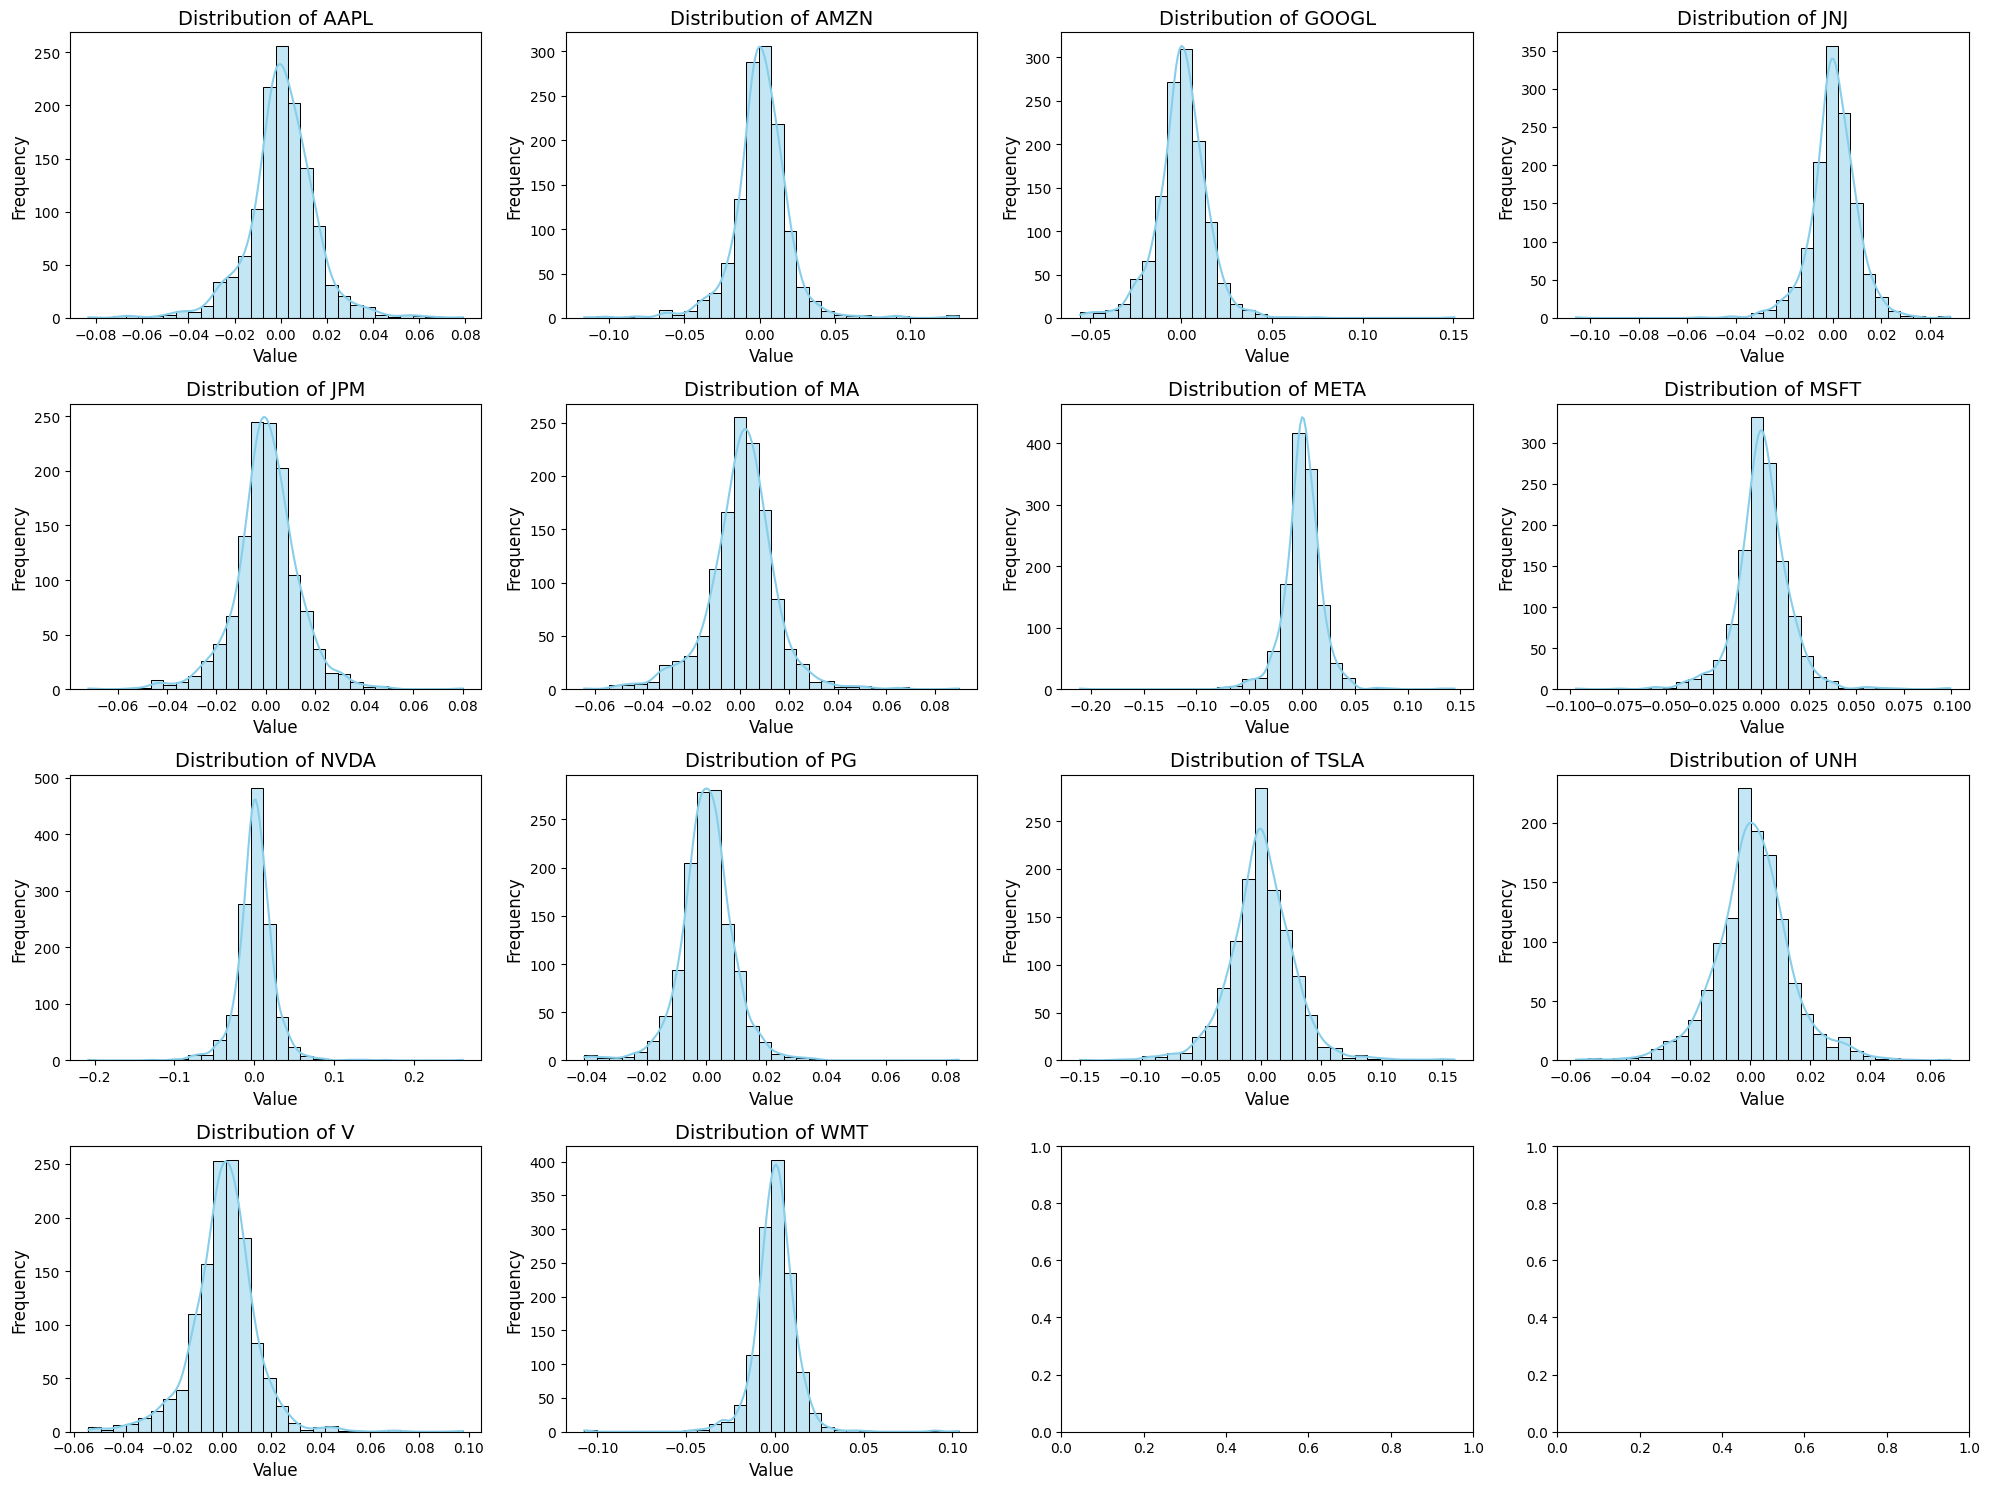

In [22]:
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(20, 15))


axes = axes.flatten()

for i, column in enumerate(Returns.columns):
    sns.histplot(Returns[column], kde=True, bins=30, color='skyblue', ax=axes[i])
    axes[i].set_title(f'Distribution of {column}', fontsize=14)
    axes[i].set_xlabel('Value', fontsize=12)
    axes[i].set_ylabel('Frequency', fontsize=12)

plt.tight_layout()
plt.show()

<font color=green><h2> 1.3 Returns Dynamics Over time</h2></font>

In [5]:
Colors=['blue','red','green','olive','purple','cyan','orange','magenta','lime','indigo','pink','brown','gray','teal']
Trace=list(np.ones(len(Tickers)))
for i in range(len(Tickers)):
  Trace[i] = go.Scatter(x=Stocks_AdjClose.index,y=Stocks_AdjClose.iloc[:,i],name=Stocks_AdjClose.columns[i],line=dict(color=Colors[i], width=2),marker=dict(size=2))

layout = go.Layout(xaxis = dict(title = 'Date'),yaxis = dict(title = 'Adj Close'),template = 'plotly_white' )

fig = go.Figure(data=Trace, layout=layout,)

fig.show()

![closing prices](marko1.JPG)

In [24]:
#Annualizing input parameters
mu=Returns.mean()*252
sigma=Returns.cov()*252

print("Expected Returns")
print(tabulate(pd.DataFrame(mu,columns=['Expected Returns']),headers="keys", tablefmt='fancy_grid'))


print('Covariance Matrix')
print(tabulate(pd.DataFrame(sigma),headers="keys", tablefmt='fancy_grid'))

Expected Returns
╒══════════╤════════════════════╕
│ Ticker   │   Expected Returns │
╞══════════╪════════════════════╡
│ AAPL     │          0.156742  │
├──────────┼────────────────────┤
│ AMZN     │          0.266265  │
├──────────┼────────────────────┤
│ GOOGL    │          0.126092  │
├──────────┼────────────────────┤
│ JNJ      │          0.0974018 │
├──────────┼────────────────────┤
│ JPM      │          0.127905  │
├──────────┼────────────────────┤
│ MA       │          0.170381  │
├──────────┼────────────────────┤
│ META     │          0.175185  │
├──────────┼────────────────────┤
│ MSFT     │          0.225679  │
├──────────┼────────────────────┤
│ NVDA     │          0.437187  │
├──────────┼────────────────────┤
│ PG       │          0.0587861 │
├──────────┼────────────────────┤
│ TSLA     │          0.159628  │
├──────────┼────────────────────┤
│ UNH      │          0.257479  │
├──────────┼────────────────────┤
│ V        │          0.181676  │
├──────────┼───────────────────

<font color=red><h1> 2. Problem Formulation</h1></font>

<font color=green><h2> 2.1 Utlity function</h2></font>

![Utility function](marko2.JPG)

In [25]:
#'minimize' from scipy is used to minimize a function, so, to maximize the utility function we need to minimize -Utility function
def utility_function(weights, expected_return, variance, risk_aversion):
    weights = np.array(weights)
    expected_return = np.array(expected_return)
    covariance = np.array(variance)


    utility = np.dot(weights,expected_return) - 0.5 * risk_aversion * np.dot(weights, np.dot(covariance,weights))
    return -utility


<font color=green><h2> 2.2 Constraints</h2></font>

![Constraints](marko3.JPG)

In [26]:
# All the weights should sum up to 1

constraints1={'type': 'eq', 'fun': lambda x: np.sum(x) - 1}

# Initial weights are the points of start of the optimization algorithm
initial_weights=np.ones(len(Returns.columns))/len(Returns.columns)

# The short selling constraint
bounds = tuple((0, 1) for _ in initial_weights)

<font color=green><h2> 2.3 Optimal Weights</h2>

<Axes: title={'center': 'Mean Variance portfolio'}>

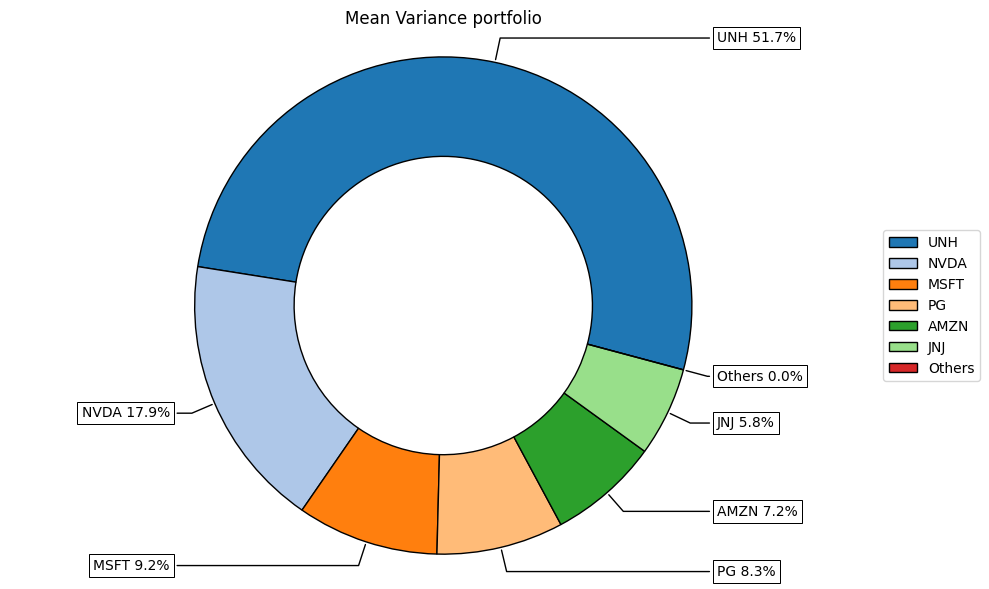

In [27]:
# We suppose that the risk aversion of the investor is 5
res = minimize(lambda weightss:utility_function(weightss,np.array(mu), np.array(sigma), 10),x0=initial_weights,method='SLSQP',constraints=constraints1,bounds=bounds,tol=1e-15)
Weights=pd.DataFrame(res.x,index=Returns.columns)
rp.plot_pie(w=Weights, title='Mean Variance portfolio', others=0.05, nrow=25, cmap = "tab20",height=6, width=10, ax=None)

<font color=red><h1> 3. Impact of Risk Aversion on Optimal Portfolio Weights</h1></font>

In [28]:
weights_riskaversion=pd.DataFrame(index=Weights.index)
for j in range(0,200):
  res = minimize(lambda weightss:utility_function(weightss,np.array(mu), np.array(sigma), j),x0=initial_weights,method='SLSQP',constraints=constraints1,bounds=bounds,tol=1e-9)
  weights_riskaversion[j]=pd.DataFrame(res.x,index=Returns.columns)

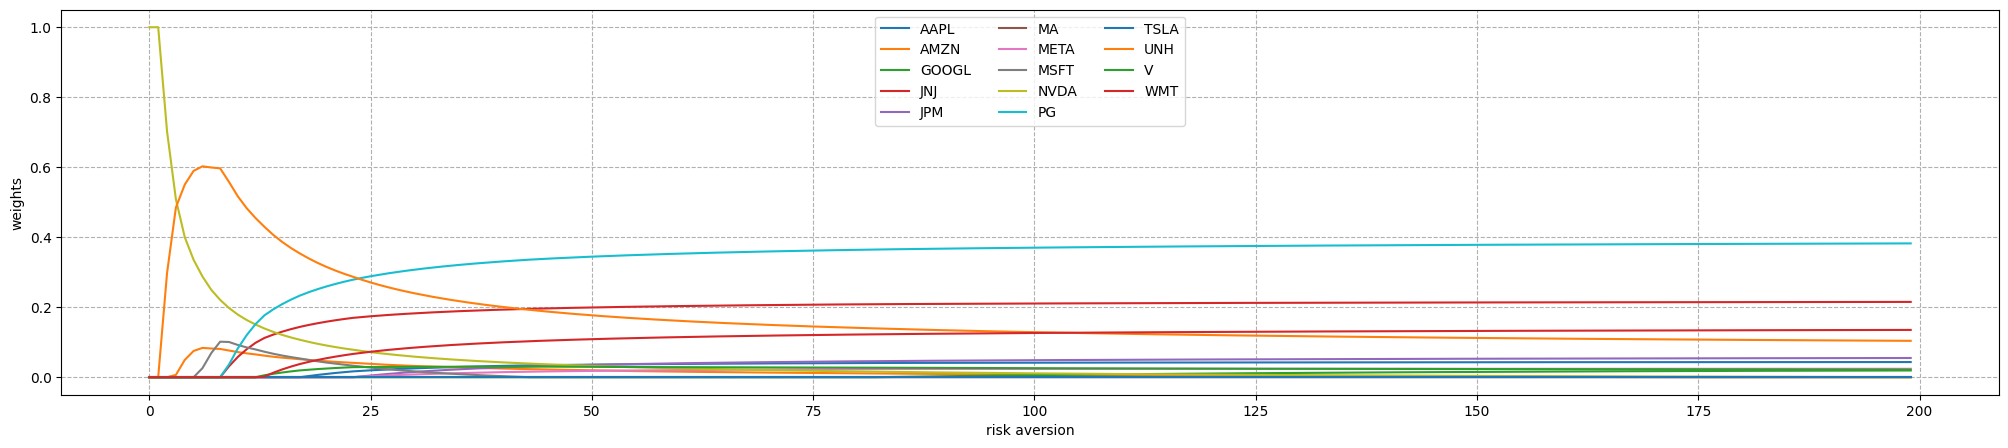

In [29]:
plt.figure(figsize=(25,5))
for i in range(len(Tickers)):
  plt.plot(weights_riskaversion.columns, weights_riskaversion.iloc[i,:])
plt.xlabel('risk aversion')
plt.ylabel('weights')
plt.legend(weights_riskaversion.index,loc='upper center', ncol=3)
plt.grid(True, linestyle='--', alpha=1)


<font color=red><h1> 4. Efficient frontier</h1></font>

<font color=green><h2> 4.1 Constraint on the Volatility of the portfolio</h2>

In [30]:
# the constraints: variance of the portfolio<=threshold volatility (vol_thresh) and the weights should all sum up to 1

constraints2 = (
        {'type': 'eq', 'fun': lambda x: np.sum(x) - 1},
        {'type': 'eq', 'fun': lambda x: vol_thresh-np.dot(x, np.dot(sigma, x.T))}
    )

<font color=green><h2> 4.2 Volatility boundaries</h2>

In [31]:
#Maximum volatity that our portfolio can reach
res_max = minimize(lambda weightss:-utility_function(weightss,np.zeros(len(Returns.columns)), np.array(sigma), 2),x0=initial_weights,method='SLSQP',constraints=constraints1,bounds=bounds,options={'maxiter': 1000000})
max_vol=np.dot((res_max.x).T, np.dot(sigma, (res_max.x)))

#Minimum volatility that our portfolio can reach
res_min=minimize(lambda weightss:utility_function(weightss,np.zeros(len(Returns.columns)), np.array(sigma), 2),x0=initial_weights,method='SLSQP',constraints=constraints1,bounds=bounds,options={'maxiter': 1000000})
min_vol=np.dot((res_min.x).T, np.dot(sigma, (res_min.x)))

<font color=green><h2> 4.3 Efficient Frontier</h2>

In [32]:
Mu_list=[]
vol_list=[]


Weights_list=pd.DataFrame(index=Returns.columns)
for k in range(500):
  vol_thresh=random.uniform(min_vol,max_vol)
  constraints2 = (
        {'type': 'eq', 'fun': lambda x: np.sum(x) - 1},
        {'type': 'ineq', 'fun': lambda x: vol_thresh-np.dot(x, np.dot(sigma, x.T)) }
    )
  res = minimize(lambda x:-np.dot(x,mu),x0=initial_weights,method='SLSQP',constraints=constraints2,bounds=bounds)
  if res.success:
    Weights=pd.DataFrame({k:res.x},index=Returns.columns)
    Weights_list=pd.concat([Weights_list,Weights],axis=1)
    portfolio_return=np.dot(Weights.T,mu)[0]
    portfolio_std=np.dot(Weights.T,np.dot(sigma,Weights))[0][0]
    if portfolio_return>=min(mu[mu>0]):
      Mu_list.append(np.dot(Weights.T,mu)[0])
      vol_list.append(np.dot(Weights.T,np.dot(sigma,Weights))[0][0]**0.5)

dat=pd.DataFrame({'mu':Mu_list,'vol':vol_list})

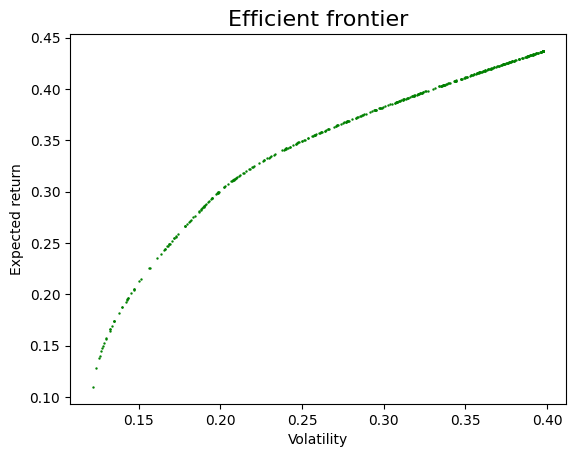

In [33]:
#plt.figure(figsize=(10, 6))
plt.scatter(vol_list, Mu_list,c='g', s=0.5)
plt.xlabel('Volatility')
plt.ylabel('Expected return')
plt.title('Efficient frontier', fontsize=16)
plt.show()

<font color=green><h2> 4.4 Efficient Frontier Composition</h2>

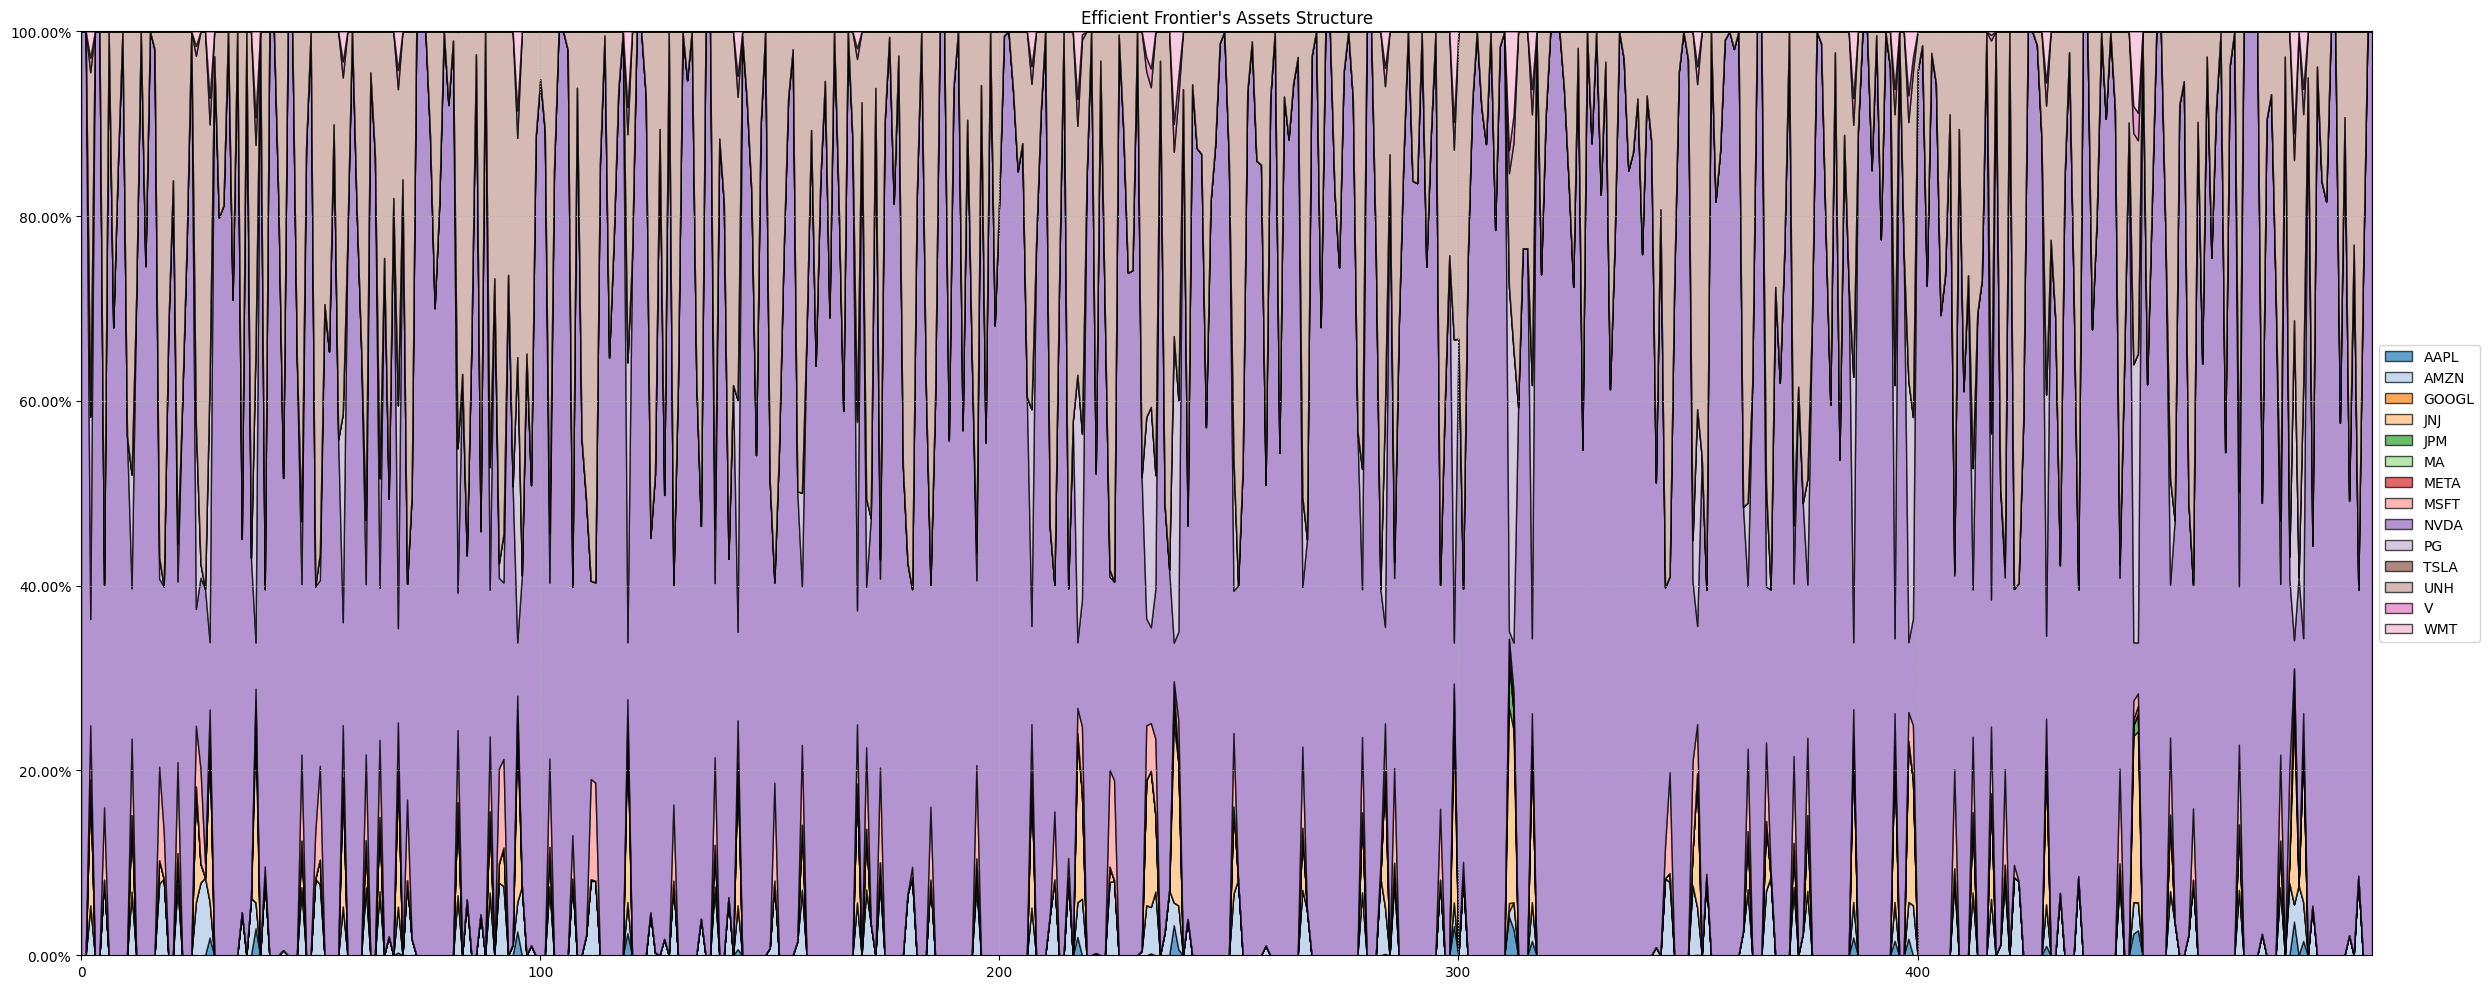

In [34]:
ax = rp.plot_frontier_area(w_frontier=Weights_list, cmap="tab20", height=10, width=25)

<font color=green><h2> 4.5 Regularization</h2>

<font color=orange><h2> 4.5.1 Method1: Resampling</h2></font>

<font color=blue><h2> 4.5.1 Method1: MONTE CARLO</h2></font>

We generate 1000 samples of asset returns from the original data. In fact, the returns are simulated using a multivariate gaussion function with mean mu (of the original data) and covariance matrix cov (of the original data)

In [35]:
W_list=[]
DAT_list=[]
Min_Vol=[]
Max_Vol=[]
n=1000

Carlo_simulations=np.random.multivariate_normal(Returns.mean(),Returns.cov(),(n,Returns.shape[0]))
for i in range(n):
  simulation_i=Carlo_simulations[i]
  mu_si=pd.DataFrame(simulation_i).mean()*252
  cov_si=pd.DataFrame(simulation_i).cov()*252
  #Maximum volatity that our portfolio can reach
  res_max = minimize(lambda weightss:-utility_function(weightss,np.zeros(len(Returns.columns)), np.array(cov_si), 2),x0=initial_weights,method='SLSQP',constraints=constraints1,bounds=bounds,options={'maxiter': 1000000})
  max_vol=np.dot((res_max.x).T, np.dot(cov_si, (res_max.x)))
  #Minimum volatility that our portfolio can reach
  res_min=minimize(lambda weightss:utility_function(weightss,np.zeros(len(Returns.columns)), np.array(cov_si), 2),x0=initial_weights,method='SLSQP',constraints=constraints1,bounds=bounds,options={'maxiter': 1000000})
  min_vol=np.dot((res_min.x).T, np.dot(cov_si, (res_min.x)))

  Min_Vol.append(min_vol)
  Max_Vol.append(max_vol)

Mu_list=[]
vol_list=[]

Vol_bound_max=max(Min_Vol)
vol_bound_min=min(Max_Vol)
vol_list_thresh=np.linspace(vol_bound_min,Vol_bound_max,n)
for i in range(n):
  Mu_list=[]
  vol_list=[]
  Weights_list=pd.DataFrame(index=Returns.columns)
  simulation_i=Carlo_simulations[i]
  mu_si=pd.DataFrame(simulation_i).mean()*252
  cov_si=pd.DataFrame(simulation_i).cov()*252
  for k in range(n):
      vol_thresh=round(vol_list_thresh[k],3)
      constraints2 = (
          {'type': 'eq', 'fun': lambda x: np.sum(x) - 1},
          {'type': 'ineq', 'fun': lambda x: vol_thresh-np.dot(x, np.dot(cov_si, x.T))}
      )
      res = minimize(lambda x:-np.dot(x,mu_si),x0=initial_weights,method='SLSQP',constraints=constraints2,bounds=bounds)
      if res.success:
        Weights=pd.DataFrame({k:res.x},index=Returns.columns)
        portfolio_return=np.dot(Weights.T,mu_si)[0]
        portfolio_std=np.dot(Weights.T,np.dot(cov_si,Weights))[0][0]
        if portfolio_return>=min(mu_si[mu_si>0]):
            Mu_list.append(round(portfolio_return,3))
            vol_list.append(round(portfolio_std,3))
            Weights_list=pd.concat([Weights_list,Weights],axis=1)


  dat=pd.DataFrame({'mu':Mu_list,'vol':vol_list})

  W_list.append(Weights_list.values)
  DAT_list.append(dat.values)

In [36]:
F=[]
for i in DAT_list:
  for j in i:
    F.append(j[1])

F=list(set(F))

Mean_eff=pd.DataFrame(index=F)
for i in range(len(DAT_list)):
  A=pd.DataFrame(DAT_list[i][:,0],DAT_list[i][:,1],columns=[str(i)])
  A=A.drop_duplicates()
  Mean_eff=Mean_eff.join(A,how='left')

In [37]:
numb=0
Monte_carlo_weights=pd.DataFrame({'Weights':[0 for _ in Returns.columns]},index=Returns.columns)
Z=[]
for i in F:
    for j in range(len(DAT_list)):
        for t in range(len(DAT_list[j])):
            if DAT_list[j][t][1]==i:
                Monte_carlo_weights=Monte_carlo_weights+pd.DataFrame({'Weights':W_list[j][:,t]},index=Returns.columns)
                numb=numb+1
    Monte_carlo_weights=Monte_carlo_weights/numb
    numb=0
    Z.append(np.dot(Monte_carlo_weights.T,mu)[0])

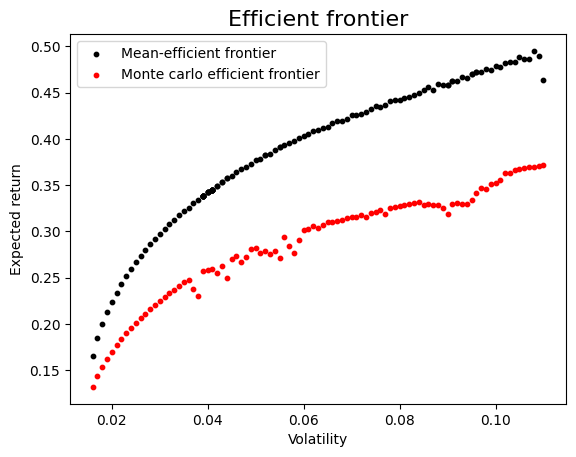

In [38]:
MO=Mean_eff.mean(axis=1,skipna=True).sort_index()

plt.scatter(MO.index,MO.values,c='k', s=10)
plt.scatter(F, np.round(Z,3),c='r', s=10)
plt.xlabel('Volatility')
plt.ylabel('Expected return')
plt.title('Efficient frontier', fontsize=16)
plt.legend(['Mean-efficient frontier','Monte carlo efficient frontier'])
plt.show()